# Deep Learning with the Keras Library

**Goals:**

- Learn how to **construct** and train a keras model on both classification and regression data.

- Specifically this means, configuring model archectiture, compiling the algorithm, and fitting/predicting.

- How to implement machine learning techniques that we know but in Keras (train/test split, cross validation)

- We'll be using Keras on the front-end and TensorFlow on the backend, meaning we'll write code with Keras but the algorithms will be powered by TensorFlow.

## Keras

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_moons, make_regression

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


You should see a message that says "Using TensorFlow Backend."

If not, follow these instructions, but only after you've installed TensorFlow.

Navigate to this directory in your terminal: `~/.keras/'`

Type: `ls`

You should see the following: `datasets	keras.json`

We're going to edit the keras.json file using command line. Type: `nano keras.json`

In the dictionary, change the value for the key "backend" to "tensorflow".

Once you're finsihed, save/exit by following the instructions.

If you haven't installed Keras and TensorFlow.
- Mac: https://www.pyimagesearch.com/2016/11/14/installing-keras-with-tensorflow-backend/

- PC: https://www.lynda.com/Google-TensorFlow-tutorials/Installing-Keras-TensorFlow-backend-Windows/601801/642176-4.html

If it's not working, don't worry! Not a big deal, either find a tutorial online (stackoverflow) or ask me.

## Classification Deep Learning

We're going to use the keras library to the fake moons dataset from sklearn

In [2]:
#Generate data
X, y = make_moons(n_samples=3000,
                    noise=0.12,
                    random_state=0)

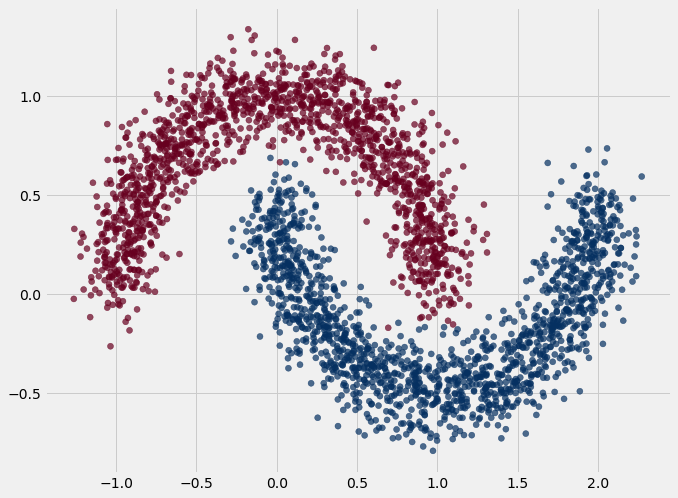

In [3]:
#Visualize data

plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 8))

plt.scatter(X[:, 0], X[:, 1], c= y, alpha = 0.7, cmap = "RdBu");

0 is red, 1 is blue

Before we make our keras model, how well would the following models work with this data: Logistic Regression, Decision Trees, and K-Nearest Neighbors

Time to design the model.

Setting up a Keras model takes more work than your a Sklearn model.

In [5]:
#Intialization with Sequential

model = Sequential()

Adding an input layer to our model using the Dense function

In [6]:
#Specify number of features in data
n_cols = X.shape[1]

#Adding layer with 10 units, activation function set to relu

model.add(Dense(10, activation="relu", input_shape=(n_cols,)))

Add an output layer, the number of units must be equal to number of unique values in target variable, which in this case is 2. Use the sigmoid activation function

In [7]:
# Add the output layer
#Assign number of uniques to n_unique
n_unique = len(pd.unique(y))
model.add(Dense(n_unique, activation= "sigmoid"))


Here we compile the model, which means setting the optimization, loss, and metric paramaters

In [8]:
#Set optimzer to Stochastic Gradient Descent, loss to categorical_crossentropy, metrics = accuracy
model.compile(optimizer="sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

Before fitting, we have to binarize the target variable

In [9]:
y_binary = to_categorical(y)
y_binary

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [10]:
#Null accuracy
pd.value_counts(y, normalize=True)

1    0.5
0    0.5
dtype: float64

Fitting time! Call .fit() like you would a sklearn model.

In [12]:

model.fit(X, y_binary, epochs=10)

Epoch 1/10
3000/3000 [==============================] - 0s 37us/step - loss: 0.6227 - acc: 0.7540
Epoch 2/10
3000/3000 [==============================] - 0s 40us/step - loss: 0.5739 - acc: 0.8150
Epoch 3/10
3000/3000 [==============================] - 0s 36us/step - loss: 0.5272 - acc: 0.8200
Epoch 4/10
3000/3000 [==============================] - 0s 38us/step - loss: 0.4838 - acc: 0.8237
Epoch 5/10
3000/3000 [==============================] - 0s 37us/step - loss: 0.4451 - acc: 0.8277
Epoch 6/10
3000/3000 [==============================] - 0s 36us/step - loss: 0.4122 - acc: 0.8330
Epoch 7/10
3000/3000 [==============================] - 0s 38us/step - loss: 0.3854 - acc: 0.8357
Epoch 8/10
3000/3000 [==============================] - 0s 39us/step - loss: 0.3642 - acc: 0.8393
Epoch 9/10
3000/3000 [==============================] - 0s 42us/step - loss: 0.3474 - acc: 0.8437
Epoch 10/10
3000/3000 [==============================] - 0s 45us/step - loss: 0.3339 - acc: 0.8460


## **CONGRATS ON MAKING YOUR FIRST DEEP LEARNING MODEL**

[Epoch defintion](https://deeplearning4j.org/glossary): "In machine-learning parlance, an epoch is a complete pass through a given dataset. That is, by the end of one epoch, your neural network will have been exposed to every record to example within the dataset once"

<br>

Epochs are another parameter that you have to configure and can have an effect on your model's performance.

Model tells use the log loss and accuracy scores for each epoch. Do you notice any trends in these scores for each epoch?

**Visualization time.** Like we did for previous, we're going to visualize the decision boundaries of this one layer neural net model. 

In [13]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40,cmap="RdBu", alpha=0.4)
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

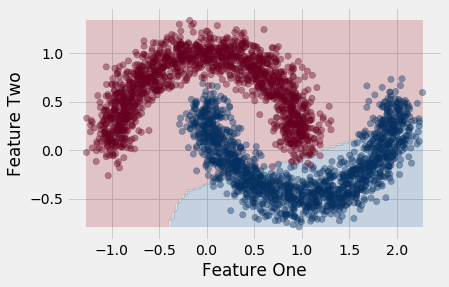

In [14]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

Thoughts on the results? How good is the model?

Make prediction on point (0,0). Works same way as sklearn.

In [15]:
point = np.array([[0, 0]])

model.predict(point)

array([[ 0.42302611,  0.33468473]], dtype=float32)

In [16]:
#these probabilities don't add up to 1. 

Instead of outputting a 0 or 1, it gives the probabilites of the of both unique values.

<br>

`.predict_classes()` is predicting the class not probability

In [17]:
model.predict_classes(point)

array([0])

This is a very simple model, it only has one shallow layer. Let's add some more layers.

In [18]:
#Intialize
model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(200, activation='relu'))


# Add the output layer with softmax activation function
model.add(Dense(2, activation="softmax"))

#Use adam optimizer
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [19]:
#Fit model with 30 epochs
model.fit(X, y_binary, epochs=40)

Epoch 1/40
3000/3000 [==============================] - 0s 85us/step - loss: 0.3176 - acc: 0.8540
Epoch 2/40
3000/3000 [==============================] - 0s 59us/step - loss: 0.1828 - acc: 0.9177
Epoch 3/40
3000/3000 [==============================] - 0s 60us/step - loss: 0.0937 - acc: 0.9657
Epoch 4/40
3000/3000 [==============================] - 0s 59us/step - loss: 0.0418 - acc: 0.9877
Epoch 5/40
3000/3000 [==============================] - 0s 65us/step - loss: 0.0217 - acc: 0.9953
Epoch 6/40
3000/3000 [==============================] - 0s 72us/step - loss: 0.0154 - acc: 0.9973
Epoch 7/40
3000/3000 [==============================] - 0s 66us/step - loss: 0.0109 - acc: 0.9983
Epoch 8/40
3000/3000 [==============================] - 0s 59us/step - loss: 0.0090 - acc: 0.9980
Epoch 9/40
3000/3000 [==============================] - 0s 58us/step - loss: 0.0098 - acc: 0.9967
Epoch 10/40
3000/3000 [==============================] - 0s 59us/step - loss: 0.0086 - acc: 0.9977
Epoch 11/40
3000/30

How does the model perform now?

Let's *see* the difference

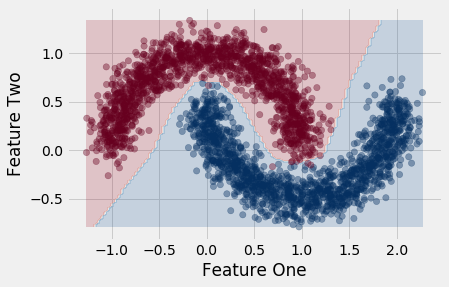

In [20]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

How does that look to you? Better or worse than before? By how much?

In [22]:
#Look at model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 20,902
Trainable params: 20,902
Non-trainable params: 0
_________________________________________________________________


We're trained a really good model, but principles of cross validation also to deep learning. Here's how we'll evaluate the model on a testing data.

In [23]:
#The same code for fitting a model as we used before but this time set validation_split to 0.25

#Intialize
model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(200, activation='relu'))


# Add the output layer with softmax activation function
model.add(Dense(2, activation="sigmoid"))

#Use adam optimizer
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.fit(X, y_binary, epochs=40, validation_split = 0.25)

Train on 2250 samples, validate on 750 samples
Epoch 1/40
2250/2250 [==============================] - 0s 112us/step - loss: 0.3944 - acc: 0.8440 - val_loss: 0.2397 - val_acc: 0.8853
Epoch 2/40
2250/2250 [==============================] - 0s 69us/step - loss: 0.2392 - acc: 0.8711 - val_loss: 0.2097 - val_acc: 0.8960
Epoch 3/40
2250/2250 [==============================] - 0s 63us/step - loss: 0.1924 - acc: 0.9147 - val_loss: 0.1377 - val_acc: 0.9427
Epoch 4/40
2250/2250 [==============================] - 0s 67us/step - loss: 0.1246 - acc: 0.9502 - val_loss: 0.0821 - val_acc: 0.9760
Epoch 5/40
2250/2250 [==============================] - 0s 66us/step - loss: 0.0687 - acc: 0.9764 - val_loss: 0.0461 - val_acc: 0.9907
Epoch 6/40
2250/2250 [==============================] - 0s 62us/step - loss: 0.0422 - acc: 0.9867 - val_loss: 0.0297 - val_acc: 0.9947
Epoch 7/40
2250/2250 [==============================] - 0s 69us/step - loss: 0.0269 - acc: 0.9947 - val_loss: 0.0172 - val_acc: 0.9960
Epoch 8

Whats your assessment of the model now? Does it overfit?

In [24]:
#NO

## Regression Deep Learning

Now let's train a neural net on a regression dataset

In [25]:
#Make regression data
Xr, yr = make_regression(n_samples=2000, n_features=1, noise=2, random_state=4,bias = 0.9)

In [26]:
yr **=2

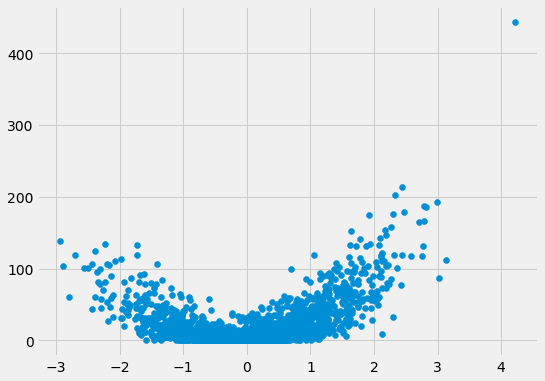

In [27]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr);

In [32]:
n_cols = Xr.shape[1]

#Intialize
model = Sequential()

# Add the first and only layer with 20 units and relu activation function
model.add(Dense(20, activation='relu', input_shape=(n_cols,)))


# Add the output layer with one unit. In regression, the output layer only has one unit.
model.add(Dense(1))


Compiler

In [33]:
#Use adam as optimizer function and set lose to mean_squared_error
model.compile(optimizer="adam", loss = "mean_squared_error")

In [34]:
#Fit model with 20 epochs
model.fit(Xr, yr, epochs = 20)

Epoch 1/20
2000/2000 [==============================] - 0s 102us/step - loss: 1357.1784
Epoch 2/20
2000/2000 [==============================] - 0s 46us/step - loss: 1336.7755
Epoch 3/20
2000/2000 [==============================] - 0s 48us/step - loss: 1312.7056
Epoch 4/20
2000/2000 [==============================] - 0s 47us/step - loss: 1282.7585
Epoch 5/20
2000/2000 [==============================] - 0s 47us/step - loss: 1246.2673
Epoch 6/20
2000/2000 [==============================] - 0s 46us/step - loss: 1205.2289
Epoch 7/20
2000/2000 [==============================] - 0s 47us/step - loss: 1161.2804
Epoch 8/20
2000/2000 [==============================] - 0s 46us/step - loss: 1116.9199
Epoch 9/20
2000/2000 [==============================] - 0s 44us/step - loss: 1072.7845
Epoch 10/20
2000/2000 [==============================] - 0s 46us/step - loss: 1028.6381
Epoch 11/20
2000/2000 [==============================] - 0s 46us/step - loss: 985.3459
Epoch 12/20
2000/2000 [==================

Let's try it again but with train test split

In [35]:
model.fit(Xr, yr, epochs = 20, validation_split=.25)

Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 0s 79us/step - loss: 605.1246 - val_loss: 906.3596
Epoch 2/20
1500/1500 [==============================] - 0s 58us/step - loss: 593.7738 - val_loss: 892.8670
Epoch 3/20
1500/1500 [==============================] - 0s 51us/step - loss: 583.2018 - val_loss: 880.0487
Epoch 4/20
1500/1500 [==============================] - 0s 53us/step - loss: 572.9383 - val_loss: 868.8974
Epoch 5/20
1500/1500 [==============================] - 0s 49us/step - loss: 563.6639 - val_loss: 856.1224
Epoch 6/20
1500/1500 [==============================] - 0s 51us/step - loss: 554.1195 - val_loss: 845.2237
Epoch 7/20
1500/1500 [==============================] - 0s 55us/step - loss: 545.1740 - val_loss: 834.3550
Epoch 8/20
1500/1500 [==============================] - 0s 49us/step - loss: 536.4448 - val_loss: 824.2670
Epoch 9/20
1500/1500 [==============================] - 0s 53us/step - loss: 528.1169 - val_loss:

Visualize predictions

In [36]:
#Predictions

preds = model.predict(Xr)
preds

array([[ 45.75634766],
       [ 17.81461143],
       [ 23.75712395],
       ..., 
       [ 13.82004547],
       [ 16.82693291],
       [ 28.33109283]], dtype=float32)

In [37]:
#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

In [38]:
#Sort dataframe

pred_df.sort_values("feature", inplace=True)

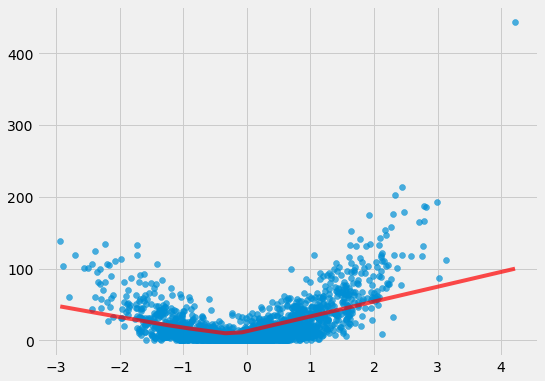

In [39]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr, alpha=.7)
plt.plot(pred_df.feature, pred_df.preds,c = "r",  alpha = 0.7);

How does that look?

**Back to the drawing board!**

We need more layers!!

In [58]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")

In [59]:
#Fit model with 40 epochs
model.fit(Xr, yr, epochs = 40, validation_split=.25)

Train on 1500 samples, validate on 500 samples
Epoch 1/40
1500/1500 [==============================] - 0s 245us/step - loss: 1196.3190 - val_loss: 1441.6937
Epoch 2/40
1500/1500 [==============================] - 0s 62us/step - loss: 859.3305 - val_loss: 927.8854
Epoch 3/40
1500/1500 [==============================] - 0s 64us/step - loss: 488.0624 - val_loss: 683.9562
Epoch 4/40
1500/1500 [==============================] - 0s 63us/step - loss: 398.6813 - val_loss: 611.2909
Epoch 5/40
1500/1500 [==============================] - 0s 63us/step - loss: 361.5494 - val_loss: 574.1954
Epoch 6/40
1500/1500 [==============================] - 0s 61us/step - loss: 342.0698 - val_loss: 549.7028
Epoch 7/40
1500/1500 [==============================] - 0s 69us/step - loss: 329.1497 - val_loss: 531.1041
Epoch 8/40
1500/1500 [==============================] - 0s 61us/step - loss: 321.0720 - val_loss: 508.8511
Epoch 9/40
1500/1500 [==============================] - 0s 65us/step - loss: 313.8687 - val_lo

In [60]:
#Predictions

preds = model.predict(Xr)
preds

#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

#Sort dataframe

pred_df.sort_values("feature", inplace=True)

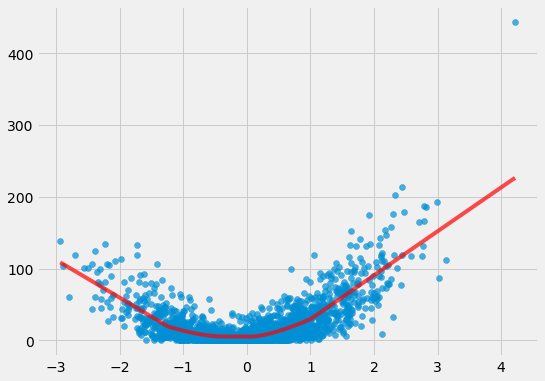

In [43]:
#Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Xr, yr, alpha=.7)
plt.plot(pred_df.feature, pred_df.preds,c = "r",  alpha = 0.7);

How does that look?

In [61]:
#Prediction
p = np.array([[0]])
model.predict(p)

array([[ 5.25539494]], dtype=float32)

In [62]:
#Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


Let's visualize the performance over the epochs, but first we have to reset the model.

In [63]:
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [64]:
#Re fit the model but set verbose to False and use 40 epochs and validation split to .3
#Assign model to m variable
m = model.fit(Xr, yr, epochs=40, validation_split=0.2, verbose=False)

In [65]:
#Call .history on m
m.history

{'loss': [1173.483662109375,
  775.4881301879883,
  471.56874420166014,
  394.82713531494142,
  363.67538360595705,
  345.8806756591797,
  332.61650390624999,
  323.99301574707033,
  321.54021621704101,
  311.99388854980469,
  309.42694412231447,
  305.29051986694338,
  304.24842605590823,
  300.75303924560546,
  298.07276168823245,
  295.81923995971681,
  292.55242492675779,
  291.74736633300779,
  287.98065505981447,
  286.42117507934569,
  283.96653427124022,
  283.89533721923829,
  282.41283981323244,
  280.14947586059571,
  278.64213562011719,
  278.26045639038085,
  277.80576110839843,
  277.72548980712889,
  275.69314773559569,
  277.60461151123047,
  274.78354980468748,
  274.63679580688478,
  274.43942367553711,
  273.83677520751951,
  274.31968231201171,
  274.28468719482424,
  274.39589859008788,
  273.70208572387696,
  274.22429367065428,
  274.05071899414065],
 'val_loss': [1415.1997998046875,
  870.80545654296873,
  693.02242309570318,
  627.4652038574219,
  589.330195312

We're going to plot the scores over the course of the epochs

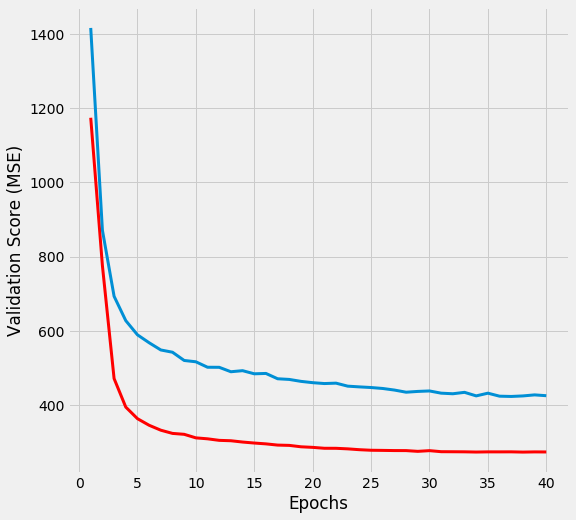

In [67]:
plt.figure(figsize=(8, 8))
epochs = range(1, 41)
plt.plot(epochs, m.history['loss'],linewidth = 3, c = 'r')
plt.plot(epochs, m.history["val_loss"], linewidth =3)
plt.xlabel("Epochs")
plt.ylabel("Validation Score (MSE)");

What relationship do you see here? What does this tell us about our epochs?

We're going to use early stopping to save us time

In [68]:
#Intialize early_stopper object with patience = 1 and min_delta = 1

es = EarlyStopping(patience=1, min_delta=1)

Patience value indicates how many epochs of no improvement until the algorithms stops fitting.

Min_delta value is the model improvement threshold it must meet in order to keep going.

Restart the model from the beginning.

In [85]:
model = Sequential()

# Add the first layer with 100 units and relu activation function
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer with 100 
model.add(Dense(100, activation='relu'))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer="adam", loss = "mean_squared_error")


In [86]:
#Fit model on regresion data, use 40 epochs, validation split of .3
#Set callbacks equal to [es]
model.fit(Xr, yr, epochs=40, validation_split=0.2, callbacks=[es])

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 0s 279us/step - loss: 1224.6164 - val_loss: 1542.1462
Epoch 2/40
1600/1600 [==============================] - 0s 64us/step - loss: 947.8073 - val_loss: 1085.6599
Epoch 3/40
1600/1600 [==============================] - 0s 67us/step - loss: 560.6751 - val_loss: 750.9952
Epoch 4/40
1600/1600 [==============================] - 0s 69us/step - loss: 421.6408 - val_loss: 665.4702
Epoch 5/40
1600/1600 [==============================] - 0s 67us/step - loss: 378.5762 - val_loss: 617.7083
Epoch 6/40
1600/1600 [==============================] - 0s 62us/step - loss: 357.4815 - val_loss: 587.8537
Epoch 7/40
1600/1600 [==============================] - 0s 61us/step - loss: 340.8731 - val_loss: 571.0094
Epoch 8/40
1600/1600 [==============================] - 0s 61us/step - loss: 330.1935 - val_loss: 547.6457
Epoch 9/40
1600/1600 [==============================] - 0s 61us/step - loss: 321.3714 - val_l

## Bonus

http://playground.tensorflow.org/

# Resources

https://github.com/GeorgeMcIntire/collection_free_DL_resources

Articles:

- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

- https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

- http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/

- https://sefiks.com/2017/11/08/softmax-as-a-neural-networks-activation-function/

- https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/


# Class Lab Time

1. Make a function that returns a pre-initialized with a two layer Keras model. The choice of parameters are up to you.

2. Pick a supervised learning dataset (regression or classification) and use Keras to model that data. Compare results of the keras model to that of a logistic regression model. You're also more than welcome to use keras on your final project data as well.


OR

You can spend the rest of class working on your final project